#  Analyze and Predict Heart Disease
 
In this session, we will use a Notebook running Python 3.5 with Apache Spark 2.1 for data analysis using Apache SystemML, IBM Cloud Object Storage and pandas DataFrames. We will also use matplotlib and seaborn for visualizations and walk through some examples of Data Analysis, Preparation, Classification, Data Normalization and Correlations. From the Machine Learning perspective, we will go through the ETL where we will train and test or data, run some classifiers to see which one is the best option, feature and model creation using the scikit learn for the Logistic Regression classifier and finaly test our model.

We will analyze open data from Heart Disease UCI and to extract even more insights, we will explore this dataset, build charts for visualization of specific areas and see how the data science can help predicting heart disease.

# Install prerequisites

To start, we will import NumPy, the fundamental library for array computing with Python, pandas for our dataframes, matplotlib and seaborn for visualizations.


In [1]:
#Import the necessary libraries needed for data exploration and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Understanding the Dataset


Data Set Information:

We will use the open data from Heart Disease UCI Machine Learning Repository. This dataset contains 14 columns and 303 records.

Attributes Information:

     age      - age in years
     sex      - (1 = male; 0 = female)
     cp       - chest pain type
     trestbps - resting blood pressure (in mm Hg on admission to the hospital)
     chol     - serum cholestoral in mg/dl
     fbs      - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
     restecg  - resting electrocardiographic results
     thalach  - maximum heart rate achieved
     exang    - exercise induced angina (1 = yes; 0 = no)
     oldpeak  - ST depression induced by exercise relative to rest
     slope    - the slope of the peak exercise ST segment
     ca       - number of major vessels (0-3) colored by flourosopy
     thal     - 3 = normal; 6 = fixed defect; 7 = reversable defect
     target   - have disease or not (1=yes, 0=no) (the predicted attribute)


About UCI Machine Learning Repository

The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Import the 'heart.csv' dataset into the Notebook

Before loading the file into your IBM Cloud Object Storage by dragging and dropping the file on the '1001' panel, you need to create a connection in your Notebook to your IBM Cloud Object Storage. To do that, from your project page, click on the 'Add to Project' and then on 'Connection', choose your Cloudant Instance and then click on 'Create'.

And then we will connect the Notebook to the IBM Cloud Object Storage by Inserting your Credentials and load the "heart.csv" dataset by Inserting pandas DataFrame so we can start with our data analysis.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_data_1.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Initial Data Preparation and Exploration


Checking the shape of the dataset

In [4]:
df_data_1.shape

(303, 14)

Let's use the Describe function to see the count, mean, std, min, max, 25%, 50%, 75% values

In [5]:
df_data_1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking the details of each column

In [6]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Notice that each column name begins with a lower case, let's rename all column names to begin with upper case

In [7]:
df_data_1=df_data_1.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

Checking the new column names

In [8]:
df_data_1.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

Now let's look for any null value

In [9]:
df_data_1.isna().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

Target columns shows if the record have disease or not (1=yes, 0=no) from all dataset:

Target - have disease or not (1=yes, 0=no) (the predicted attribute)

In [10]:
df_data_1.Target.value_counts()

1    165
0    138
Name: Target, dtype: int64

Getting the percentage of the Target column details

In [11]:
Disease_Count_yes = len(df_data_1[df_data_1.Target == 1])
Disease_Count_no = len(df_data_1[df_data_1.Target == 0])
print("{:.2f}% have heart disease".format((Disease_Count_yes / (len(df_data_1.Target))*100)))
print("{:.2f}% does not have heart disease".format((Disease_Count_no / (len(df_data_1.Target))*100)))

54.46% have heart disease
45.54% does not have heart disease


Now let's plot the details of Target column

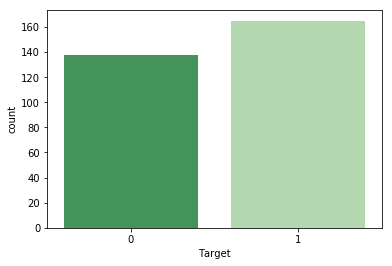

In [12]:
sns.countplot(x="Target", data=df_data_1, palette="Greens_r")
plt.show()

From the Sex column, we can see the percentage of males and females (1 = male; 0 = female)

In [13]:
Male_count = len(df_data_1[df_data_1.Sex == 1])
Female_count = len(df_data_1[df_data_1.Sex == 0])
print("{:.2f}% are Male".format((Male_count / (len(df_data_1.Sex))*100)))
print("{:.2f}% are Female".format((Female_count / (len(df_data_1.Sex))*100)))

68.32% are Male
31.68% are Female


And plot the results

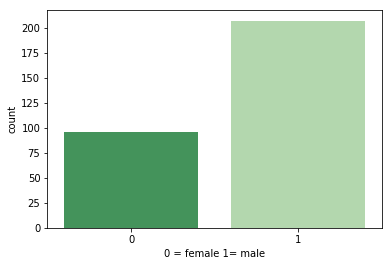

In [14]:
sns.countplot(x='Sex', data=df_data_1, palette="Greens_r")
plt.xlabel("0 = female 1= male")
plt.show()

Now let's explore the Age column getting the count

In [15]:
df_data_1.Age.value_counts()[:20]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
Name: Age, dtype: int64

And plot the results

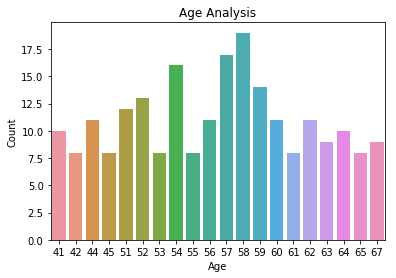

In [16]:
sns.barplot(x=df_data_1.Age.value_counts()[:20].index,y=df_data_1.Age.value_counts()[:20].values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Analysis')
plt.show()

Analyzing the mean

In [17]:
df_data_1.groupby('Target').mean()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal
Target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Combining the Age with Target columns, we will see the frequency of heart disease based on the age

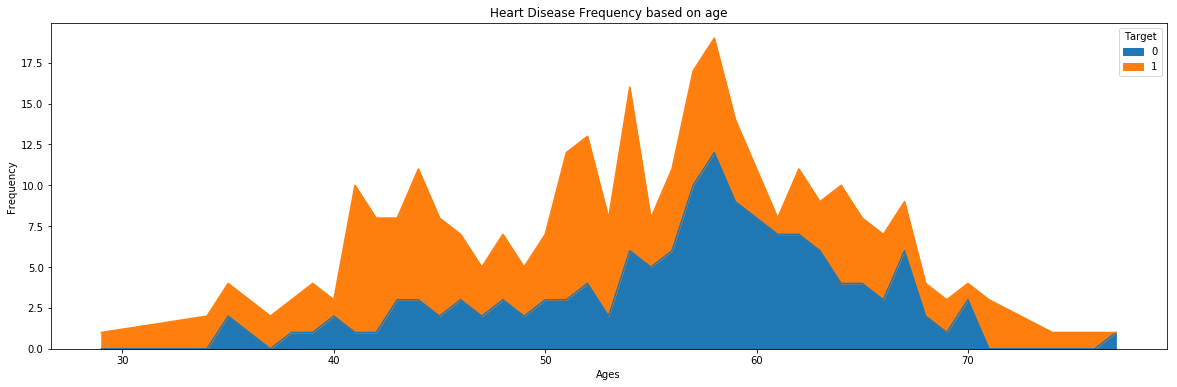

In [18]:
pd.crosstab(df_data_1.Age,df_data_1.Target).plot(kind="area",figsize=(20,6))
plt.title('Heart Disease Frequency based on age')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

Also the frequency based on chest pain type

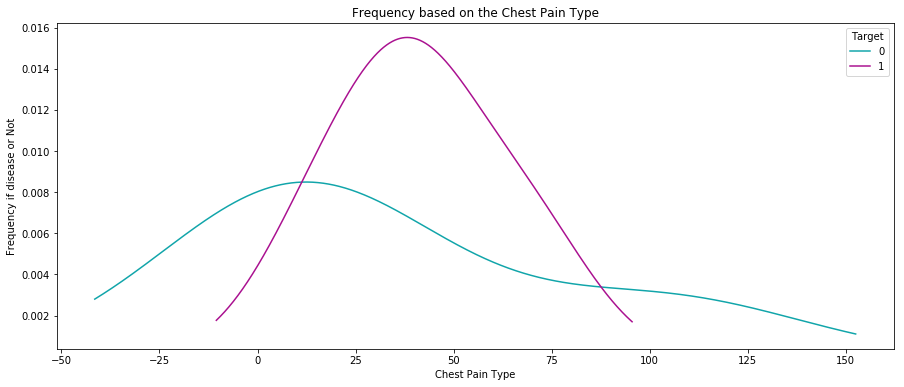

In [19]:
pd.crosstab(df_data_1.Cp,df_data_1.Target).plot(kind="kde",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Frequency based on the Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency if disease or Not')
plt.show()

Male's age average who suffered a stroke

In [20]:
df_data_1[(df_data_1.Target ==  1) & (df_data_1.Sex == 1)].Age.mean()

50.903225806451616

Female's age average who suffered a stroke

In [21]:
df_data_1[(df_data_1.Target ==  1) & (df_data_1.Sex == 0)].Age.mean()

54.55555555555556

Checking the correlation values between them

In [22]:
df_data_1.corr()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
Restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Correlation Matrix

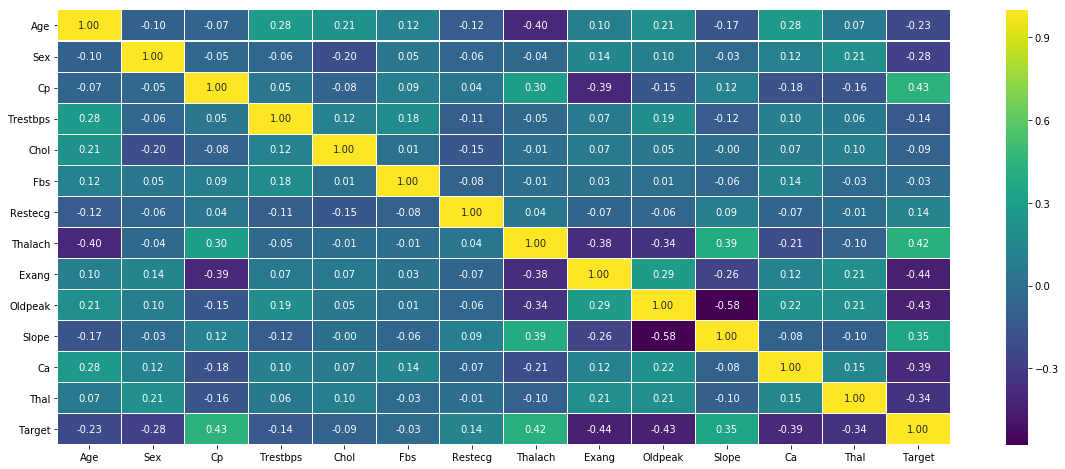

In [23]:
fig,ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_data_1.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="viridis")
plt.show()

# ETL

Import all the necessary libraries

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Creating the array

In [25]:
y=df_data_1.Target.values
x_data=df_data_1.drop(["Target"],axis=1)

In [26]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,


Data Normalization / feature scaling

In [27]:
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [28]:
x.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


Now we will split or data:

* 70 % will be train data
* 30% will be test data

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

We will use several classifiers to check which one has the highest accuracy score

Since we will be using some classifiers, let's store the results in a list for a better view at the end of this session

In [30]:
scores_accuracy=[]

## Decision Tree classifier

In [31]:
#from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])
print("Decision Tree Accuracy: ",dt.score(x_test,y_test))

Decision Tree Accuracy:  0.736263736264


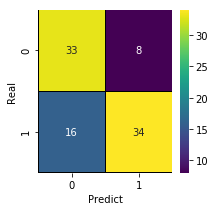

In [32]:
#from sklearn.metrics import confusion_matrix
y_predict_dt = dt.predict(x_test)
y_real_dt = y_test
cm_dt = confusion_matrix (y_real_dt,y_predict_dt)
f, ax =plt.subplots(figsize=(3,3))
sns.heatmap(cm_dt,annot=True,linewidths=0.2,linecolor="black",fmt=".0f",cmap="viridis",ax=ax)
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

## K-nearest neighbors (KNN) classifier

In [33]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" KNN Accuracy with {} nn: {} ".format(12,knn.score(x_test,y_test)))

 KNN Accuracy with 12 nn: 0.7802197802197802 


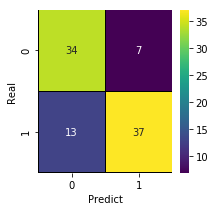

In [34]:
#from sklearn.metrics import confusion_matrix
y_predict_knn = knn.predict(x_test)
y_real_knn = y_test
cm_knn = confusion_matrix (y_real_knn,y_predict_knn)
f, ax =plt.subplots(figsize=(3,3))
sns.heatmap(cm_knn,annot=True,linewidths=0.2,linecolor="black",fmt=".0f",cmap="viridis",ax=ax)
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

## Logistic Regression classifier

In [35]:
#from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])
print("Logistic Regression Accuracy: {}".format(lr.score(x_test,y_test)))

Logistic Regression Accuracy: 0.7912087912087912


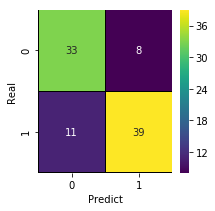

In [36]:
#from sklearn.metrics import confusion_matrix
y_predict = lr.predict(x_test)
y_real = y_test
cm = confusion_matrix (y_real,y_predict)
f, ax =plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",fmt=".0f",cmap="viridis",ax=ax)
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

Let's compare the score of each algorithm

In [37]:
scores_accuracy

[['DT', 0.73626373626373631],
 ['KNN', 0.78021978021978022],
 ['LR', 0.79120879120879117]]

From those three classifiers, Logistic Regression has the best accuracy: 0.79120879120879117 and will be used in this session


In [38]:
from sklearn.model_selection import train_test_split
from pyspark.sql.types import *
x_train, x_test = train_test_split(df_data_1,test_size =0.2,random_state=0)
mySchema = StructType([StructField("Age", IntegerType(), False)\
                       ,StructField("Sex", IntegerType(), False)\
                       ,StructField("Cp", IntegerType(), False)\
                       ,StructField("Trestbps", IntegerType(), False)\
                       ,StructField("Chol", IntegerType(), False)\
                       ,StructField("Fbs", IntegerType(), False)\
                       ,StructField("Restecg", IntegerType(), False)\
                       ,StructField("Thalach", IntegerType(), False)\
                       ,StructField("Exang", IntegerType(), False)\
                       ,StructField("Oldpeak", FloatType(), False)\
                       ,StructField("Slope", IntegerType(), False)\
                       ,StructField("Ca", IntegerType(), False)\
                       ,StructField("Thal", IntegerType(), False)\
                       ,StructField("Target", IntegerType(), False)])
df_data_1_train = spark.createDataFrame(x_train, schema=mySchema)
df_data_1_test = spark.createDataFrame(x_test, schema=mySchema)

## Feature Creation

In [39]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

indexer = StringIndexer(inputCol="Target", outputCol="label")
vectorAssembler = VectorAssembler(inputCols=["Age","Sex","Cp","Trestbps","Chol","Fbs","Restecg","Thalach","Exang","Oldpeak","Slope","Ca","Thal"],outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

## Model Creation - Final Model

In [40]:
from pyspark.ml.classification import LogisticRegression

log_reg = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [41]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=(indexer, vectorAssembler, normalizer, log_reg))

In [42]:
model=pipeline.fit(df_data_1_train)

In [43]:
prediction = model.transform(df_data_1_train)

## Evaluation

In [44]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluation = MulticlassClassificationEvaluator().setMetricName('accuracy').setLabelCol('label').setPredictionCol('prediction')

In [45]:
evaluation.evaluate(prediction)

0.5413223140495868

## Test

In [46]:
model=pipeline.fit(df_data_1_test)

In [47]:
prediction = model.transform(df_data_1_test)

In [48]:
evaluation.evaluate(prediction)

0.5573770491803278

# Conclusion

After running various classifiers, the Logistic Regression model had the best performance. But if you want to build a larger project, you could also run other classifiers such as Random Forest, Gradient Boosting, KNN, SVM and Naive Bayes to go deeper on your analysis.


The main indicators of heart disease stem from the healthiness of your heart (seems quite obvious). Although other health indicators like resting bps and blood sugar are good for overall health. Heart disease stems from having an unhealthy heart